## CMPINF 2100 Week 11
### Regression Performance Metrics
We will calc the perf metrics for a LINEAR MODEL but these metrics can be used even if you are using more advanced models for Regression.
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
import statsmodels.formula.api as smf

## Read data
We will use the LINEAR RELATIONSHIP data set for this notebook.

In [3]:
df = pd.read_csv("week_11_linear_data.csv")

In [4]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


## Fit the linear model

In [7]:
lm_fit = smf.ols(formula="y ~ x", data=df).fit()

In [9]:
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.82
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.66e-05
Time:                        16:37:17   Log-Likelihood:                -12.580
No. Observations:                   9   AIC:                             29.16
Df Residuals:                       7   BIC:                             29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4765      0.370     -1.288      0.2

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [11]:
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [12]:
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

In [13]:
lm_fit.conf_int()

,0,1
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


We can also visualize the coefficient summaries using a COEFFICIENT PLOT.

In [25]:
def my_coefplot(mod, figsize_use=(10,4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar(y=mod.params.index,
               x=mod.params,
               xerr=2*mod.bse, fmt="o", color="k", ecolor="k", elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle="--", linewidth=3.5, color="grey")

    ax.set_xlabel("coefficient value")

    plt.show()

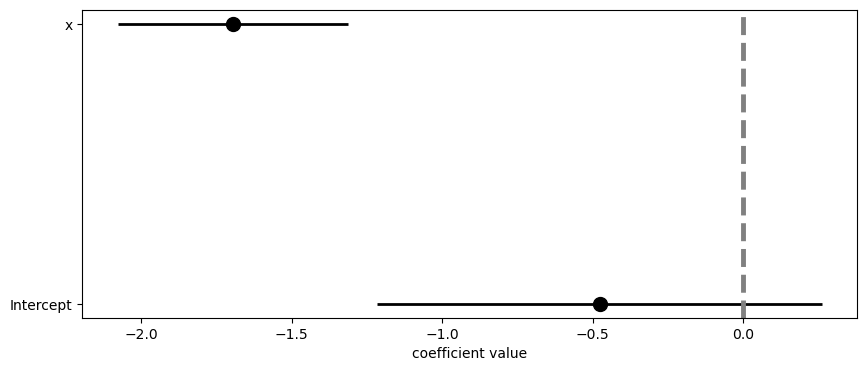

In [26]:
my_coefplot(lm_fit)

## Measure performance
What is the "goodness of fit" of the model on the TRAINING data (data used to estimate coefficients)

The predictions on the TRAINING data are stored with the fitted model object. The TRAINING set predictions are commonly called the model "FITS" or the FITTED VALUES.

In [28]:
lm_fit.fittedvalues

0    4.612676
1    3.340376
2    2.068076
3    0.795777
4   -0.476523
5   -1.748823
6   -3.021123
7   -4.293422
8   -5.565722
dtype: float64

We could visually compare the MODEL FITTED VALUES or TRAINING PREDICTIONS to the OBSERVED OUTPUTS.

In [29]:
df_copy = df.loc[:, ["x", "y"]].copy()

In [30]:
df_copy["fitted"] = lm_fit.fittedvalues

In [31]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


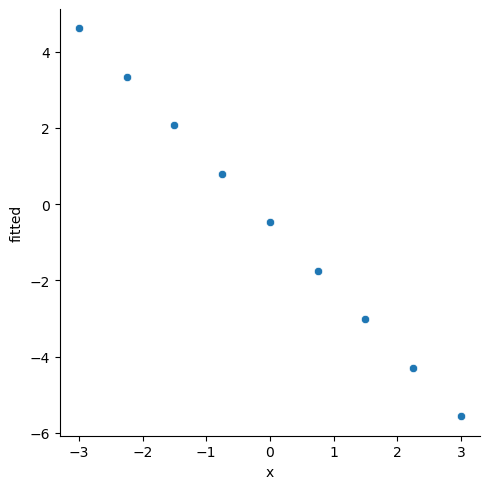

In [32]:
sns.relplot(data=df_copy, x="x", y="fitted")

plt.show()

To compare the OBSERVED OUTPUT to the MODEL FITS...one approach is to overlay the observed output vs the INPUT with the PREDICTED TREND or FITTED VALUES with the input.

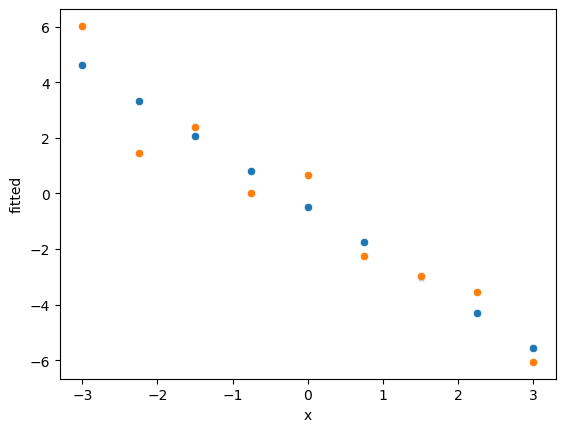

In [33]:
fig, ax = plt.subplots()

sns.scatterplot(data=df_copy, x="x", y="fitted", ax=ax)

sns.scatterplot(data=df_copy, x="x", y="y", ax=ax)

plt.show()

Instead, its easier to DIRECTLY relate the OBSERVED OUTPUT and the MODEL FITS.

This kind of scatter plot is import it has its own name.

Its called the PREDICTED vs OBSERVED figure!!!

In [35]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


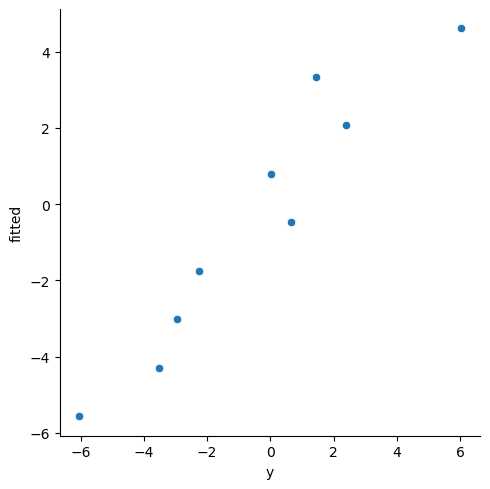

In [36]:
sns.relplot(data=df_copy, x="y", y="fitted")

plt.show()

Lets include a 45 degree reference line with our PREDICTED vs OBSERVED figure.

The easiest way to include the additional reference line is to use the Seaborn Axis level functions rathern than the Figure level functions.

In [40]:
sns.set_style("whitegrid")

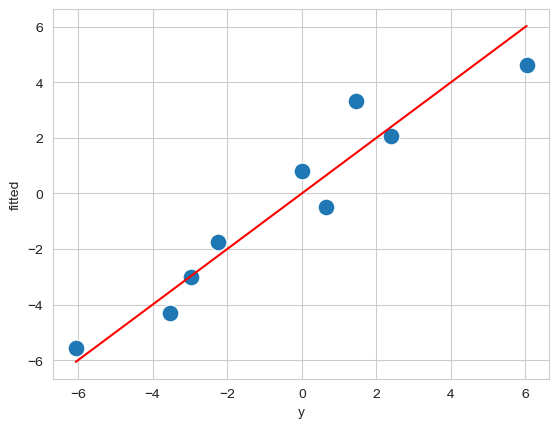

In [41]:
fig, ax = plt.subplots()

sns.scatterplot(data=df_copy, x="y", y="fitted", s=150, ax=ax)

sns.lineplot(data=df_copy, x="y", y="y", color="red", ax=ax)

plt.show()

But quite often, we want a NUMBER or a QUANTITATIVE metric for the **CORRELATION** between the model predictions and the observed output. This single number can be quantified by calculating the CORRELATION COEFFICIENT between the model FITS and the observed OUTPUT.

In [43]:
df_copy.loc[:, ["y", "fitted"]].corr()

,y,fitted
y,1.000000,0.958347
fitted,0.958347,1.000000


In [45]:
df_copy.loc[:, ["y", "fitted"]].corr().iloc[0,1]

0.9583473874664296

Correlation coefficient can be NEGATIVE or POSITIVE so lets SQUARE the correlation coefficient!!!

In [47]:
df_copy.loc[:, ["y", "fitted"]].corr().iloc[0,1]**2

0.9184297150637308

We just calculated the model's R squared!!!!!

In [48]:
lm_fit.rsquared

0.918429715063731

Statsmodels calculates the R-squared using a particular formula.

Ideally R-squared is equal to 1 and a really bad model has an R-squared of 0.

But please be careful...we will see later when we work with sklearn that depending on the formular that you use...you can have a NEGATIVE R-squared value...

But negative R-squared values MAKE NO SENSE!!!

## Errors or Residuals
The error is the difference between the OBSERVED and the PREDICTED TREND or FITTED VALUES.

In [49]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


In [50]:
df_copy["errors"] = df_copy.y - df_copy.fitted

In [51]:
df_copy

,x,y,fitted,errors
0,-3.00,6.030315,4.612676,1.417639
1,-2.25,1.457911,3.340376,-1.882465
2,-1.50,2.388383,2.068076,0.320307
3,-0.75,0.007815,0.795777,-0.787961
4,0.00,0.651244,-0.476523,1.127767
5,0.75,-2.254007,-1.748823,-0.505184
6,1.50,-2.969992,-3.021123,0.051131
7,2.25,-3.537097,-4.293422,0.756326
8,3.00,-6.063282,-5.565722,-0.497560


We can visualize the ERRORS with respect to the INPUT.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


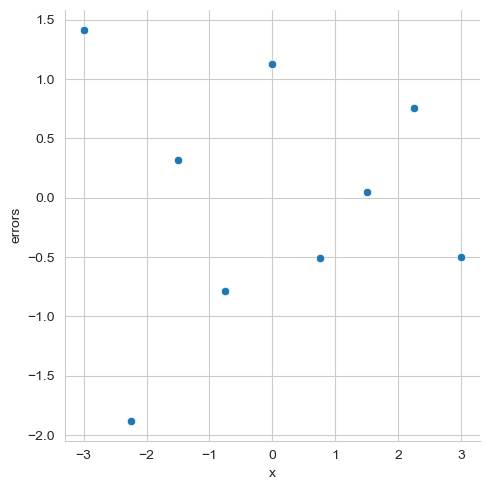

In [52]:
sns.relplot(data=df_copy, x="x", y="errors")

plt.show()

Errrors are so import that the statsmodels object already stores them!!!

In [53]:
lm_fit.resid

0    1.417639
1   -1.882465
2    0.320307
3   -0.787961
4    1.127767
5   -0.505184
6    0.051131
7    0.756326
8   -0.497560
dtype: float64

In [54]:
df_copy["residuals"] = lm_fit.resid

In [55]:
df_copy

,x,y,fitted,errors,residuals
0,-3.00,6.030315,4.612676,1.417639,1.417639
1,-2.25,1.457911,3.340376,-1.882465,-1.882465
2,-1.50,2.388383,2.068076,0.320307,0.320307
3,-0.75,0.007815,0.795777,-0.787961,-0.787961
4,0.00,0.651244,-0.476523,1.127767,1.127767
5,0.75,-2.254007,-1.748823,-0.505184,-0.505184
6,1.50,-2.969992,-3.021123,0.051131,0.051131
7,2.25,-3.537097,-4.293422,0.756326,0.756326
8,3.00,-6.063282,-5.565722,-0.497560,-0.497560


The RESIDUALS or the ERRORS can be calculated for EVERY data point...but we want to SUMMARIZE the ERROR or RESIDUAL ACROSS all the data points!!!

There are 2 commons ways to summarize the ERRORs.

The MOST common is to SQUARE the ERROR!!!

In [56]:
lm_fit.resid**2

0    2.009701
1    3.543673
2    0.102596
3    0.620883
4    1.271859
5    0.255211
6    0.002614
7    0.572029
8    0.247566
dtype: float64

We summarize the SQUARED ERROR!!!

SUMMING the SQUARED ERROR is known as the **SSE**.

In [57]:
(lm_fit.resid**2).sum()

8.626133173634281

But the SSE increases as the number of data points increases...

For those reasons we often **AVERAGE** the Squared ERRORS!!! This is referred to as the **MEAN SQUARED ERROR or MSE**

In [59]:
(lm_fit.resid**2).mean()

0.9584592415149201

The MSE is in the OUTPUT units squared.

We apply the SQUARE ROOT to the MSE to produce an error metric in the same units as the OUTPUT!!!

The square root of MSE is known as the **ROOT Mean Squared Error or RMSE**.

In [61]:
np.sqrt((lm_fit.resid**2).mean())

0.9790093163575718

The RMSE is essentially the SIGMA parameter that we defined when we generated the random data!!!!

The other kind of important ERROR metric is based on the ABSOLUTE ERROR.

In [63]:
np.abs(lm_fit.resid)

0    1.417639
1    1.882465
2    0.320307
3    0.787961
4    1.127767
5    0.505184
6    0.051131
7    0.756326
8    0.497560
dtype: float64

The **MEAN ABSOLUTE ERROR or MAE** is the average absolute error of the training data.

In [64]:
np.abs(lm_fit.resid).mean()

0.8162599885208113

## Summary

We have seen 2 types of performance metrics for Regression problems.

We have seen the GENERAL linear relationship expresssed in the PREDICTED vs OBSERVED figure quantified as R-squared.

We have also seen the ERROR metrics that **SUMMARIZE** the errors of a model. We can calculate those errors based on the SQUARED ERROR, which is summarized as the MSE or RMSE. Or, we can calc those errors based on the ABSOLUTE ERROR which is summarized as the MAE.